In [16]:
import matplotlib.pyplot as plt
import pathlib
import json

First implete a single plot version, later will support plotting on various versions and comparison.

In [17]:
def read_log(log_file):
    with open(log_file) as f:
        # read one line by json
        lines_data = [json.loads(line) for line in f.readlines()]

    # STAT_ITEMS = ['build_cycles', 'traverse_cycles', 'total_flops', 'build_nodes']
    res = {}
    res['tri_num'] = [line['tri_num'] for line in lines_data]
    res['build_cycles'] = [line['build_cycles'] for line in lines_data]
    res['traverse_cycles'] = [line['traverse_cycles'] for line in lines_data]
    res['total_flops'] = [line['total_flops'] for line in lines_data]
    res['run_time'] = [line['run_time'] for line in lines_data]
    
    return res
    
def get_exp_name(log_name):
    # '1684844148-quick_count.log'
    return log_name.split('-')[1].split('.')[0]

ouput_dir = pathlib.Path('output')
log_name_list = ['1684844148-base_count.log', '1684844148-quick_count.log']
data = {}
for log_name in log_name_list:
    exp_name = get_exp_name(log_name)
    data[exp_name] = read_log(ouput_dir / log_name)

{'base_count': {'tri_num': [100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 1100000, 1200000, 1300000, 1400000, 1500000, 1600000, 1700000, 1800000, 1900000], 'build_cycles': [424568030, 1094639114, 1915370058, 2551272420, 3600238948, 4496750162, 5482171004, 6688750566, 7953465940, 8801975996, 9881843172, 10969779584, 12311080240, 13245250600, 15144949008, 16926696302, 17955851396, 19222424002, 23248524314], 'traverse_cycles': [105760082, 106926066, 107683986, 109125386, 108331176, 107490298, 108256848, 116105960, 109698382, 110291802, 111064096, 111572924, 114654314, 111634210, 113990728, 113340776, 114402732, 115382720, 116837534], 'total_flops': [26585920, 26680688, 26793732, 26882562, 26962578, 27010884, 27063626, 27173886, 27216710, 27280428, 27354244, 27426744, 27504222, 27605862, 27676610, 27712514, 27814794, 27763446, 27826810], 'run_time': [0.25072813034057617, 0.5617201328277588, 0.942335844039917, 1.2390153408050537, 1.7280337810516357, 2.1415

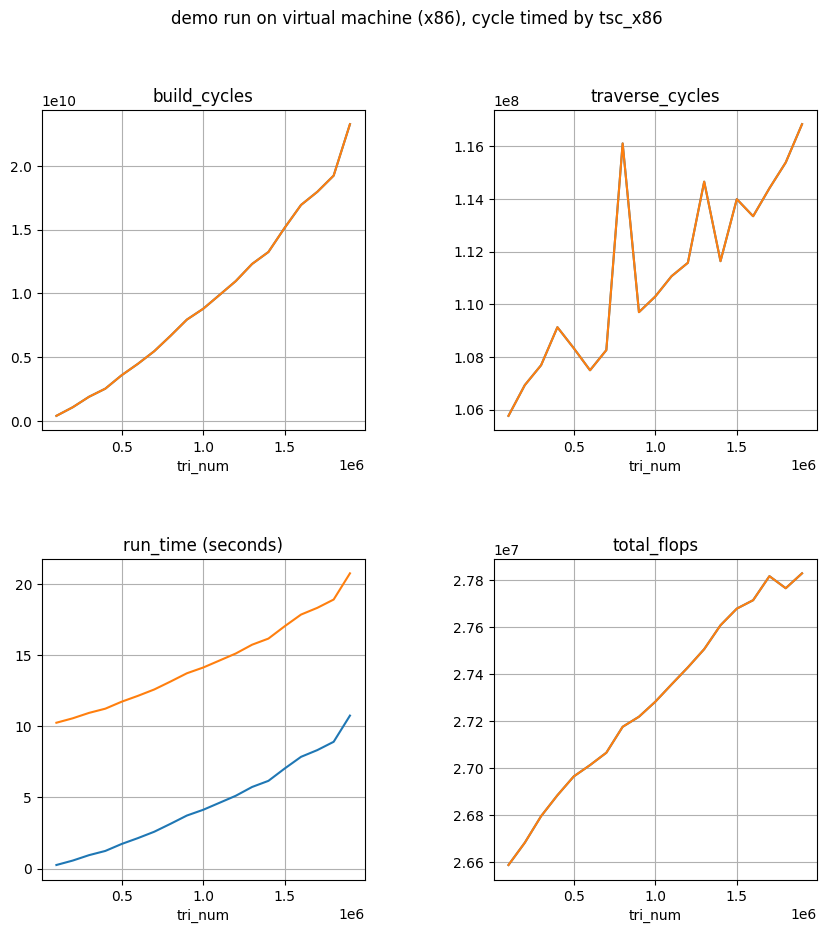

In [18]:
# plot four figures, tri_num is the x axis
fig, axs = plt.subplots(2, 2, figsize=(10, 10))  # Set subplot size to (6, 6)
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Increase margin between subplots
fig.suptitle("demo run on virtual machine (x86), cycle timed by tsc_x86")

build_ax = axs[0, 0]
traverse_ax = axs[0, 1]
runtime_ax = axs[1, 0]
flops_ax = axs[1, 1]

# TODO(xiaoyuan): more colors
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

def add_list(l):
    return [x + 10 for x in l]

for i, (exp_name, exp_data) in enumerate(data.items()):
    build_ax.plot(exp_data['tri_num'], exp_data['build_cycles'], label=exp_name, color=colors[i])
    traverse_ax.plot(exp_data['tri_num'], exp_data['traverse_cycles'], label=exp_name, color=colors[i])
    runtime_ax.plot(exp_data['tri_num'], exp_data['run_time'], label=exp_name, color=colors[i])
    flops_ax.plot(exp_data['tri_num'], exp_data['total_flops'], label=exp_name, color=colors[i])

build_ax.set_title('build_cycles')
build_ax.set_xlabel('tri_num')  # Add x-axis label
traverse_ax.set_title('traverse_cycles')
traverse_ax.set_xlabel('tri_num')  # Add x-axis label
runtime_ax.set_title('run_time (seconds)')
runtime_ax.set_xlabel('tri_num')  # Add x-axis label
flops_ax.set_title('total_flops')
flops_ax.set_xlabel('tri_num')  # Add x-axis label

# common settings
for ax in axs.flat:
    ax.grid(True)

plt.show()
